In [122]:
import torch
from torch import nn

import cloudpickle

import matplotlib.pyplot as plt
from ipywidgets import interact

import numpy as np
import os

In [123]:
plt.rcParams['figure.figsize'] = [5,4]
plt.rcParams['font.size'] = 16
plt.rcParams['savefig.bbox'] = 'standard'#'tight'
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'

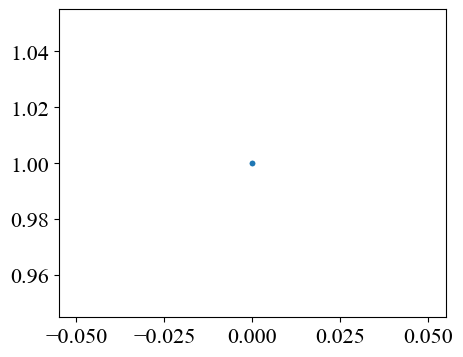

In [124]:
plt.plot([0, 0], [1, 1], 'o-')

In [125]:
simulation_dir = 'mcmSimulate_20240423191644' #'mcmNonParamODE2Dsym_20240312182210/reSimulate_20240423133657'# the directory where the simulation results are stored
dataName = 'Mcm_SDE_traj_celltype' #'Mcm_ODE_traj' # the name of the data file
t_dataName = 'Mcm_SDE_t_eval' #'Mcm_ODE_t_eval' # the name of the time file

In [126]:
xct = torch.load(os.path.join(simulation_dir, dataName+'.pt'))
x = xct['xtheta']
ct = xct['celltype']
print(x.shape)
print(x)
print(ct.shape)
print(ct)

torch.Size([301, 6, 400, 3])
tensor([[[[6.8076e+00, 1.0789e+01, 5.1156e+00],
          [1.2491e+01, 1.1105e+01, 2.8567e+00],
          [1.2733e+01, 1.5842e+01, 5.2821e+00],
          ...,
          [1.8154e+01, 1.5188e+01, 1.0770e+00],
          [4.8010e-01, 4.3235e+00, 6.9449e-01],
          [1.5312e+01, 8.2567e+00, 4.5015e+00]],

         [[7.1919e+00, 8.5020e+00, 3.1207e+00],
          [1.1024e+01, 1.4443e+01, 6.0770e+00],
          [9.8787e+00, 3.6447e+00, 3.0360e+00],
          ...,
          [1.0723e+01, 4.4881e+00, 5.1074e+00],
          [1.1080e+01, 1.1608e+01, 4.6326e+00],
          [1.3620e+00, 6.4223e+00, 1.0161e+00]],

         [[1.7872e+01, 3.9619e+00, 4.8869e+00],
          [6.1879e+00, 1.2995e+01, 1.0862e+00],
          [8.5596e+00, 1.0144e+01, 1.2633e+00],
          ...,
          [1.1787e+01, 9.4842e+00, 3.7028e+00],
          [6.3112e+00, 1.3947e+01, 4.5685e+00],
          [4.6212e+00, 1.4168e+01, 1.8976e+00]],

         [[8.3522e+00, 1.7531e+01, 1.9082e+00],
        

In [127]:
ts = torch.load(os.path.join(simulation_dir, t_dataName+'.pt'))
print(ts)

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [128]:
N_batch = x.shape[1]
N_t = x.shape[0]

In [129]:
def plot_particles(n, t, flg_track=False):
    fig, ax = plt.subplots()
    
    qscale=1.5
    
    ax.plot(x[t, n, ct[n]==0, 0], x[t, n, ct[n]==0, 1], 'k.')
    ax.plot(x[t, n, ct[n]==1, 0], x[t, n, ct[n]==1, 1], 'r.')
    ax.quiver(x[t, n, ct[n]==0, 0], x[t, n, ct[n]==0, 1], torch.cos(x[t, n, ct[n]==0, 2]), torch.sin(x[t, n, ct[n]==0, 2]), 
             angles='xy', scale_units='xy', scale=qscale, color='k')
    ax.quiver(x[t, n, ct[n]==1, 0], x[t, n, ct[n]==1, 1], torch.cos(x[t, n, ct[n]==1, 2]), torch.sin(x[t, n, ct[n]==1, 2]), 
             angles='xy', scale_units='xy', scale=qscale, color='r')
    ax.grid(True)
    ax.set_aspect('equal')
    xy_mean = torch.mean(x[t, n, :, 0:2], dim=0)
    if flg_track:
        ax.set_xlim([xy_mean[0]-L/2, xy_mean[0]+L/2])
        ax.set_ylim([xy_mean[1]-L/2, xy_mean[1]+L/2])
    else:
        ax.set_xlim([0, L])
        ax.set_ylim([0, L])
    #ax.set_xlabel('x')
    #ax.set_ylabel('y')
    ax.set_title(r'$t = ${:.1f}'.format(ts[t]))
    return fig, ax

In [130]:
L = 20 # the size of the domain to be plotted

@interact(n=(0, N_batch-1), t = (0, N_t-1))
def f(n, t):
    fig, ax = plot_particles(n,t)
    #ax.set_xlim([6, 9])
    #ax.set_ylim([6, 9])

interactive(children=(IntSlider(value=2, description='n', max=5), IntSlider(value=150, description='t', max=30…

In [131]:
n_batch = 0 # the batch number to be plotted
flg_track = False # whether to track the center of particles or not

savefig_dir = os.path.join(simulation_dir, 'batch'+str(n_batch))
os.makedirs(savefig_dir, exist_ok=True)

for t in [1, 75, 200]:
    fig, ax = plot_particles(n_batch, t, flg_track)
    fig.savefig(os.path.join(savefig_dir, 't{:03}.svg'.format(t)))
    plt.clf()
    plt.close()

In [132]:
#n_batch = 2
#flg_track = False

#savefig_dir = os.path.join(simulation_dir, 'batch'+str(n_batch))
#os.makedirs(savefig_dir, exist_ok=True)

for t in range(N_t):
    fig, ax = plot_particles(n_batch, t, flg_track)
    fig.savefig(os.path.join(savefig_dir, 't{:03}'.format(t)))
    plt.clf()
    plt.close()